In [12]:
import numpy as np

class Hebbian:
    def __init__(self, modifiedHebbianRuleFlag = False):
        self.modifiedHebbianRuleFlag = modifiedHebbianRuleFlag

    def network(self):
      self.input = np.array([[[1, 1, 1],
                 [1, -1, 1],
                 [1, -1, 1],
                 [1, -1, 1],
                 [1, 1, 1]],
                 [[1, 1, 1],
                 [1, -1, 1],
                 [1, 1, 1],
                 [1, -1, 1],
                 [1, 1, 1]]])
      self.desired = [np.array(input[0].flatten()), np.array(input[1].flatten())] 

      input_= [input[0].reshape(1,15), input[1].reshape(1,15)]
      
      if self.modifiedHebbianRuleFlag:
          i = np.identity(15)
          w = np.matmul(input[0].reshape(15,1),input[0].reshape(15,1).T) + np.matmul(input[1].reshape((15,1)),input[1].reshape((15,1)).T)-2*i
          print('Modified Hebbian Rule')
      else:
          w = np.matmul(input[0].reshape(15,1),input[0].reshape(15,1).T) + np.matmul(input[1].reshape((15,1)),input[1].reshape((15,1)).T)
          print('Hebbian Rule')
        
      print(w, '\n')
      
      out = np.matmul(input_,w)
      def activation(x):
          return np.where(x > 0, np.where(x <= 0, x, 1.0), -1.0)

      out = activation(out)

      # print('Output: ',out[0],'.')
      # print('Desired: ',self.desired[0],'.')
      # diif = np.count_nonzero(self.desired[0] != out[0])

if __name__ == '__main__':
    hebbianModel = Hebbian()
    hebbianModel.network()

    modifiedHebbianModel = Hebbian(modifiedHebbianRuleFlag=True)
    modifiedHebbianModel.network()

Hebbian Rule
[[ 2  2  2  2 -2  2  2  0  2  2 -2  2  2  2  2]
 [ 2  2  2  2 -2  2  2  0  2  2 -2  2  2  2  2]
 [ 2  2  2  2 -2  2  2  0  2  2 -2  2  2  2  2]
 [ 2  2  2  2 -2  2  2  0  2  2 -2  2  2  2  2]
 [-2 -2 -2 -2  2 -2 -2  0 -2 -2  2 -2 -2 -2 -2]
 [ 2  2  2  2 -2  2  2  0  2  2 -2  2  2  2  2]
 [ 2  2  2  2 -2  2  2  0  2  2 -2  2  2  2  2]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 2  2  2  2 -2  2  2  0  2  2 -2  2  2  2  2]
 [ 2  2  2  2 -2  2  2  0  2  2 -2  2  2  2  2]
 [-2 -2 -2 -2  2 -2 -2  0 -2 -2  2 -2 -2 -2 -2]
 [ 2  2  2  2 -2  2  2  0  2  2 -2  2  2  2  2]
 [ 2  2  2  2 -2  2  2  0  2  2 -2  2  2  2  2]
 [ 2  2  2  2 -2  2  2  0  2  2 -2  2  2  2  2]
 [ 2  2  2  2 -2  2  2  0  2  2 -2  2  2  2  2]] 

Modified Hebbian Rule
[[ 0.  2.  2.  2. -2.  2.  2.  0.  2.  2. -2.  2.  2.  2.  2.]
 [ 2.  0.  2.  2. -2.  2.  2.  0.  2.  2. -2.  2.  2.  2.  2.]
 [ 2.  2.  0.  2. -2.  2.  2.  0.  2.  2. -2.  2.  2.  2.  2.]
 [ 2.  2.  2.  0. -2.  2.  2.  0.  2.  2. -2.  2.  2.

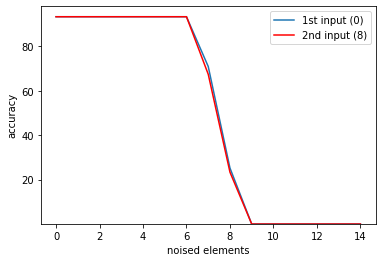

In [237]:
import numpy as np

class Hebbian:
    def __init__(self, modifiedHebbianRuleFlag = False):
        self.modifiedHebbianRuleFlag = modifiedHebbianRuleFlag

    def activation(self, x):
        return np.where(x > 0, np.where(x <= 0, x, 1.0), -1.0)


    def network(self):
      input = np.array([[[1, 1, 1],
                 [1, -1, 1],
                 [1, -1, 1],
                 [1, -1, 1],
                 [1, 1, 1]],
                 [[1, 1, 1],
                 [1, -1, 1],
                 [1, 1, 1],
                 [1, -1, 1],
                 [1, 1, 1]]])


      accuracy0 = []
      accuracy1 = []
      import copy
      for k in range(15):
          sum0 = 0
          sum1 = 0
          N = 200
          for k2 in range(N):              
              input = np.array([[[1, 1, 1],
                        [1, -1, 1],
                        [1, -1, 1],
                        [1, -1, 1],
                        [1, 1, 1]],
                        [[1, 1, 1],
                        [1, -1, 1],
                        [1, 1, 1],
                        [1, -1, 1],
                        [1, 1, 1]]])
              desired = copy.copy([np.array(input[0].flatten()), np.array(input[1].flatten())]) 
              input_= copy.copy([input[0].reshape(1,15), input[1].reshape(1,15)])
              i = np.identity(15)
              w = copy.copy(np.matmul(input[0].reshape(15,1),input[0].reshape(15,1).T) + np.matmul(input[1].reshape((15,1)),input[1].reshape((15,1)).T))-2*i
              # print(w)

              index = np.random.choice(15, k, replace = False)

              for i in range(k):
                if input_[0][0][index[i]] == 1:
                  input_[0][0][index[i]] = -1
                else:
                  input_[0][0][index[i]] = 1
              index2 = np.random.choice(15, k, replace = False)
              for i in range(k):
                if input_[1][0][index2[i]] == 1:
                  input_[1][0][index2[i]] = -1
                else:
                  input_[1][0][index2[i]] = 1

              out = np.matmul(input_,w)
              out = np.sign(out)
              # print(out)

              # print('Output: ',out[0],'.')
              # print('Desired: ',desired[0],'.')
              sum0 += np.count_nonzero(desired[0] != out[0])
              sum1 += np.count_nonzero(desired[1] != out[1])
          accuracy0.append(100*(15-sum0/N)/15)
          accuracy1.append(100*(15-sum1/N)/15)

      import matplotlib.pyplot as plt
      plt.plot(accuracy0, label='1st input (0)')
      plt.plot(accuracy1,'r', label='2nd input (8)')
      plt.ylim((0.100))
      plt.xlabel('noised elements')
      plt.ylabel('accuracy')
      plt.legend()
      plt.show()
if __name__ == '__main__':

    modifiedHebbianModel = Hebbian(modifiedHebbianRuleFlag=True)
    modifiedHebbianModel.network()

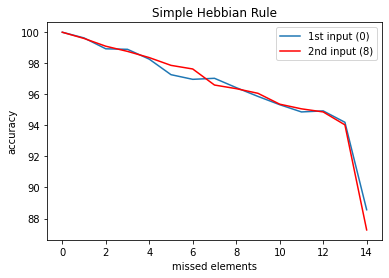

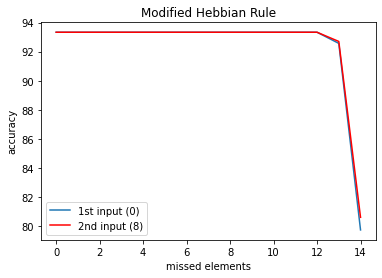

In [224]:
import numpy as np
import matplotlib.pyplot as plt

class Hebbian:
    def __init__(self, modifiedHebbianRuleFlag = False):
        self.modifiedHebbianRuleFlag = modifiedHebbianRuleFlag

    def activation(self, x):
        return np.where(x > 0, np.where(x <= 0, x, 1.0), -1.0)


    def network(self):
      input = np.array([[[1, 1, 1],
                 [1, -1, 1],
                 [1, -1, 1],
                 [1, -1, 1],
                 [1, 1, 1]],
                 [[1, 1, 1],
                 [1, -1, 1],
                 [1, 1, 1],
                 [1, -1, 1],
                 [1, 1, 1]]])


      accuracy0 = []
      accuracy1 = []
      import copy
      for k in range(15):
          sum0 = 0
          sum1 = 0
          N = 200
          for k2 in range(N):
              
              input = np.array([[[1, 1, 1],
                        [1, -1, 1],
                        [1, -1, 1],
                        [1, -1, 1],
                        [1, 1, 1]],
                        [[1, 1, 1],
                        [1, -1, 1],
                        [1, 1, 1],
                        [1, -1, 1],
                        [1, 1, 1]]])

              desired = copy.copy([np.array(input[0].flatten()), np.array(input[1].flatten())]) 
              input_= copy.copy([input[0].reshape(1,15), input[1].reshape(1,15)])
              i = np.identity(15)
              w = copy.copy(np.matmul(input[0].reshape(15,1),input[0].reshape(15,1).T) + np.matmul(input[1].reshape((15,1)),input[1].reshape((15,1)).T))
              
                  
              if self.modifiedHebbianRuleFlag:
                  i = np.identity(15)
                  w = w - 2*i
                  plt.title('Modified Hebbian Rule')
              else:
                  plt.title('Simple Hebbian Rule')
              index = np.random.choice(15, k, replace = False)

              for i in range(k):
                if input_[0][0][index[i-1]] == 1:
                  input_[0][0][index[i-1]] = 0
                else:
                  input_[0][0][index[i-1]] = 0

              index2 = np.random.choice(15, k, replace = False)

              for i in range(k):
                if input_[1][0][index2[i-1]] == 1:
                  input_[1][0][index2[i-1]] = 0
                else:
                  input_[1][0][index2[i-1]] = 0
              out = np.matmul(input_,w)
              out = np.sign(out)
              # print(out)

              # print('Output: ',out[0],'.')
              # print('Desired: ',desired[0],'.')
              z0 = np.count_nonzero(desired[0] != out[0])
              z1 = np.count_nonzero(desired[1] != out[1])
              sum0 += z0
              sum1 += z1
          accuracy0.append(100*(15-sum0/N)/15)
          accuracy1.append(100*(15-sum1/N)/15)
      plt.plot(accuracy0, label='1st input (0)')
      plt.plot(accuracy1,'r', label='2nd input (8)')
      plt.xlabel('missed elements')
      plt.ylabel('accuracy')
      plt.legend()
      plt.show()
if __name__ == '__main__':
    hebbianModel = Hebbian()
    hebbianModel.network()

    modifiedHebbianModel = Hebbian(modifiedHebbianRuleFlag=True)
    modifiedHebbianModel.network()

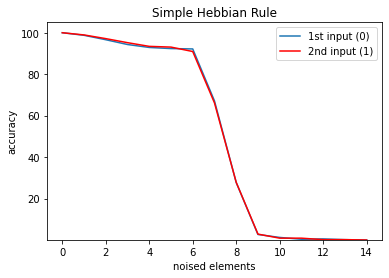

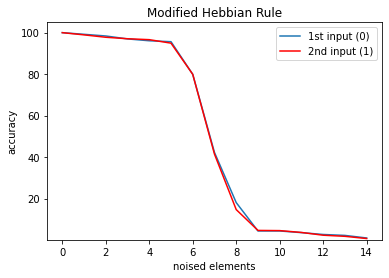

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Hebbian:
    def __init__(self, modifiedHebbianRuleFlag = False):
        self.modifiedHebbianRuleFlag = modifiedHebbianRuleFlag

    def activation(self, x):
        return np.where(x > 0, np.where(x <= 0, x, 1.0), -1.0)


    def network(self):
      input = np.array([[[1, 1, 1],
                 [1, -1, 1],
                 [1, -1, 1],
                 [1, -1, 1],
                 [1, 1, 1]],
                 [[1, 1, 1],
                 [1, -1, 1],
                 [1, 1, 1],
                 [1, -1, 1],
                 [1, 1, 1]]])


      accuracy0 = []
      accuracy1 = []
      import copy
      for k in range(15):
          sum0 = 0
          sum1 = 0
          N = 75
          for k2 in range(N):
              
              input = np.array([[[1, 1, 1],
                        [1, -1, 1],
                        [1, -1, 1],
                        [1, -1, 1],
                        [1, 1, 1]],
                        [[-1, 1, -1],
                        [-1, 1, -1],
                        [-1, 1, -1],
                        [-1, 1, -1],
                        [-1, 1, -1]]])

              desired = copy.copy([np.array(input[0].flatten()), np.array(input[1].flatten())]) 
              input_= copy.copy([input[0].reshape(1,15), input[1].reshape(1,15)])
              i = np.identity(15)
              w = copy.copy(np.matmul(input[0].reshape(15,1),input[0].reshape(15,1).T) + np.matmul(input[1].reshape((15,1)),input[1].reshape((15,1)).T))
              
                  
              if self.modifiedHebbianRuleFlag:
                  i = np.identity(15)
                  w = w - 2*i
                  plt.title('Modified Hebbian Rule')
              else:
                  plt.title('Simple Hebbian Rule')

              index = np.random.choice(15, k, replace = False)

              for i in range(k):
                if input_[0][0][index[i-1]] == 1:
                  input_[0][0][index[i-1]] = -1
                else:
                  input_[0][0][index[i-1]] = 1

              index2 = np.random.choice(15, k, replace = False)

              for i in range(k):
                if input_[1][0][index2[i-1]] == 1:
                  input_[1][0][index2[i-1]] = -1
                else:
                  input_[1][0][index2[i-1]] = 1
              out = np.matmul(input_,w)
              out = np.sign(out)
              # print(out)

              # print('Output: ',out[0],'.')
              # print('Desired: ',desired[0],'.')
              z0 = np.count_nonzero(desired[0] != out[0])
              z1 = np.count_nonzero(desired[1] != out[1])
              sum0 += z0
              sum1 += z1
          accuracy0.append(100*(15-sum0/N)/15)
          accuracy1.append(100*(15-sum1/N)/15)
      plt.plot(accuracy0, label='1st input (0)')
      plt.plot(accuracy1,'r', label='2nd input (1)')
      plt.ylim((0.100))
      plt.xlabel('noised elements')
      plt.ylabel('accuracy')
      plt.legend()
      plt.show()
if __name__ == '__main__':
    hebbianModel = Hebbian()
    hebbianModel.network()

    modifiedHebbianModel = Hebbian(modifiedHebbianRuleFlag=True)
    modifiedHebbianModel.network()